In [9]:
import pandas as pd
import plotly.express as px

In [2]:
lkd = pd.read_csv("Connections.csv")

In [3]:
lkd.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Đorđe,Baralić,NaN,Matematički Institut SANU,Deputy Communications Director,26 Nov 2020
1,Emil,Hajric,NaN,Helpjuice,Founder & CEO,26 Nov 2020
2,Isidora,Salim,NaN,Teachers Without Borders,Intern,26 Nov 2020
3,Bogdan,Drešević,NaN,Netconomy,Product Owner,26 Nov 2020
4,Nemanja,Kurbalija,NaN,SumUp,Senior Product Manager,28 Jan 2020


In [5]:
lkd.shape

(5, 6)

In [8]:
sorted_kld = lkd.sort_values(by="Connected On")

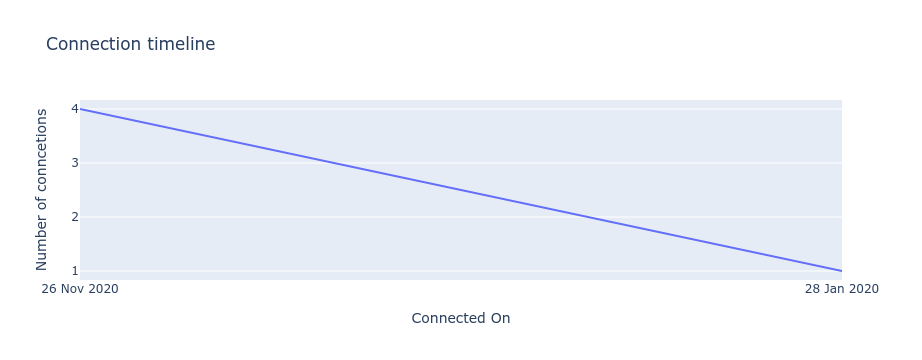

In [12]:
px.line(lkd.groupby('Connected On').count().reset_index(),
       x='Connected On',
       y='First Name',
       labels = {'First Name':'Number of conncetions'},
       title = 'Connection timeline')

In [41]:
group_company = lkd.groupby(by = "Company").count().sort_values("Connected On", ascending = False).reset_index(drop = False)
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Helpjuice,1,1,0,1,1
1,Matematički Institut SANU,1,1,0,1,1
2,Netconomy,1,1,0,1,1
3,SumUp,1,1,0,1,1
4,Teachers Without Borders,1,1,0,1,1


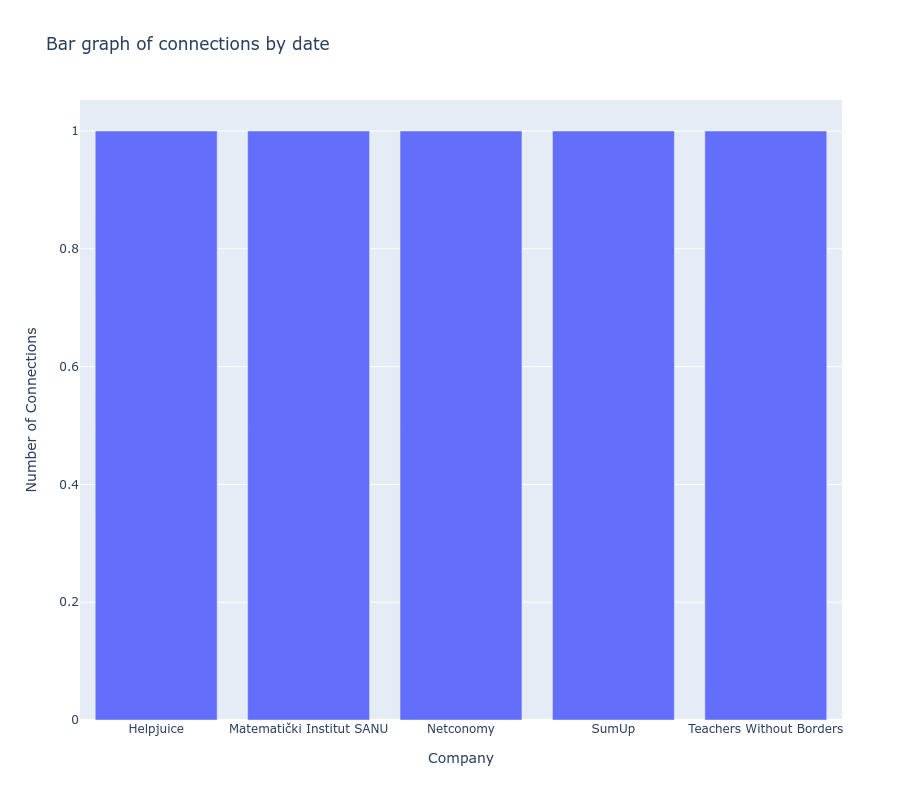

In [42]:
fig = px.bar(group_company[:200],
      x='Company',
      y='Connected On',
      labels = {'Connected On':"Number of Connections"},
      width = 1000,
      height = 800,
      title = "Bar graph of connections by date")
fig

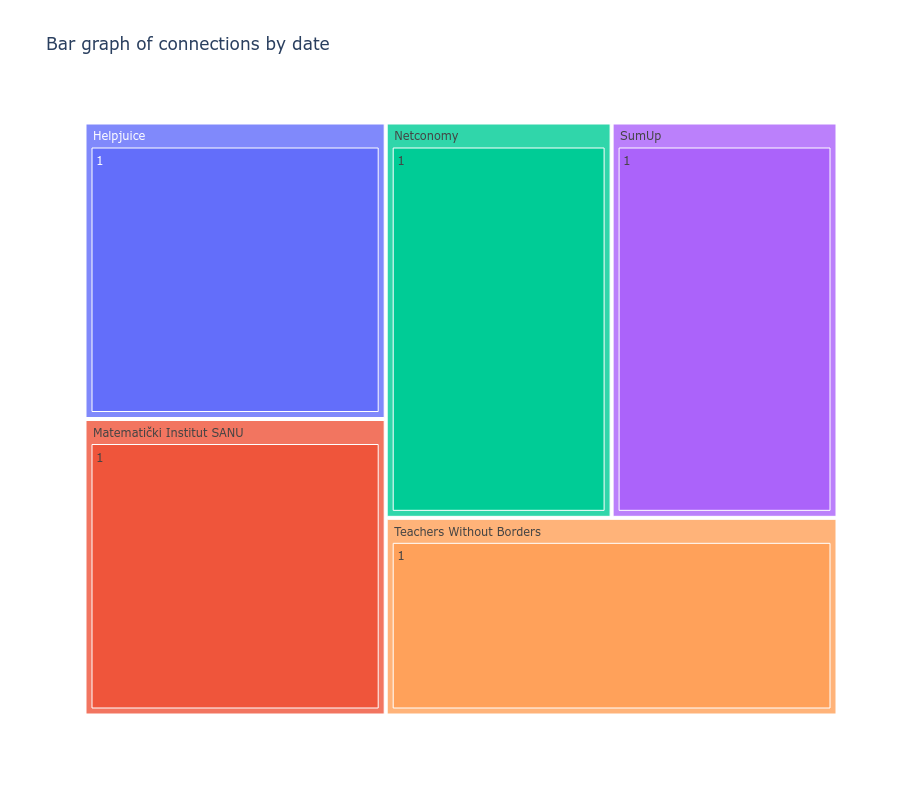

In [44]:
fig1 = px.treemap(group_company[:200], path = ['Company','Position'], values='Connected On',
      labels = {'Connected On':"Number of Connections"},
      width = 1000,
      height = 800,
      title = "Bar graph of connections by date")
fig1

In [45]:
lkd

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Đorđe,Baralić,NaN,Matematički Institut SANU,Deputy Communications Director,26 Nov 2020
1,Emil,Hajric,NaN,Helpjuice,Founder & CEO,26 Nov 2020
2,Isidora,Salim,NaN,Teachers Without Borders,Intern,26 Nov 2020
3,Bogdan,Drešević,NaN,Netconomy,Product Owner,26 Nov 2020
4,Nemanja,Kurbalija,NaN,SumUp,Senior Product Manager,28 Jan 2020


In [50]:
lkd['Position'].value_counts()/len(lkd)*100 #daje vrednosti u procentima

Intern                            20.0
Deputy Communications Director    20.0
Product Owner                     20.0
Senior Product Manager            20.0
Founder & CEO                     20.0
Name: Position, dtype: float64

In [55]:
lkd['Position'].value_counts()[lkd['Position'].value_counts()/len(lkd)*100 > 5] 

Intern                            1
Deputy Communications Director    1
Product Owner                     1
Senior Product Manager            1
Founder & CEO                     1
Name: Position, dtype: int64

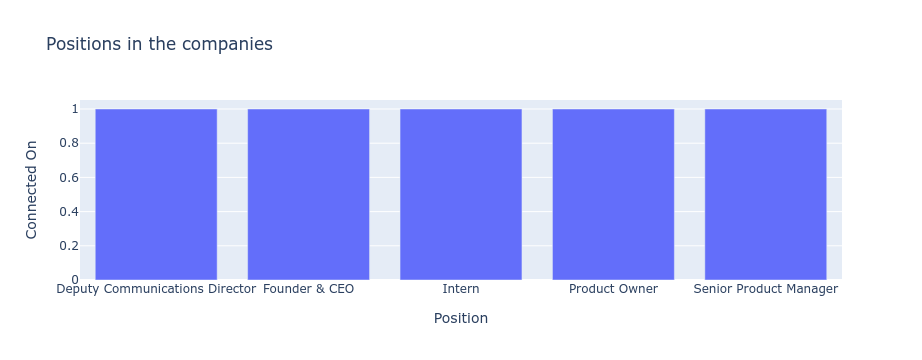

In [63]:
px.bar(lkd.groupby(by = 'Position').count().sort_values(by = 'First Name', ascending = False).reset_index(drop = False),
      x='Position',
      y='Connected On',
      title = "Positions in the companies"
      )

In [65]:
!pip install wordcloud
from wordcloud import WordCloud

     |████████████████████████████████| 371 kB 1.7 MB/s eta 0:00:01


In [80]:
import matplotlib.pyplot as plt
%matplotlib

def CreateWordCloud(text):
    wordcloud = WordCloud(width = 1000, height = 900, background_color = "black", colormap = 'set2').generate(text)
    figure = plt.figure(figsize=(15.10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.show()
    return figure

positions = ' '.join(lkd[~lkd.Position.isnull()].Position.unique())

CreateWordCloud(positions)

Using matplotlib backend: Qt5Agg


ValueError: 'set2' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'